In [17]:
import requests
from bs4 import BeautifulSoup as BS
import time

In [2]:
def prettify_page(url):
    headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36'}
    page = requests.get(url, headers=headers, timeout=5)
    soup = BS(page.content, 'html.parser').html
    return soup

In [3]:
first_page = prettify_page('https://www.imdb.com/search/title/?title_type=feature&release_date=2009-01-01,2011-12-31&countries=us&sort=boxoffice_gross_us,desc&count=250')

In [4]:
second_page = prettify_page('https://www.imdb.com/search/title/?title_type=feature&release_date=2009-01-01,2011-12-31&countries=us&sort=boxoffice_gross_us,desc&count=250&start=251&ref_=adv_nxt')

In [5]:
def parse_movies(soup):
    movies_dict = {}
    items = soup.find_all('div', class_='lister-item')
    
    for item in items:
        
        movie_id = item.find('h3', class_='lister-item-header')
        movie_id = movie_id.find('a')
        movie_id = movie_id['href']
        
        movie_id = movie_id.replace('/title/', '')
        movie_id = movie_id.replace('/', '')
        movie_id = movie_id.replace('?ref_=adv_li_tt', "")
        
        title = item.find('h3', class_='lister-item-header')
        title = title.find('a').string
        
        
        user_rating = item.find('div', class_='ratings-imdb-rating') 
        if user_rating:
            user_rating = user_rating.find('strong').string
        else:
            user_rating = -1
            
        user_rating = int(float(user_rating) * 10) 
        
        metascore = item.find('div', class_ = 'ratings-metascore')
        if metascore: 
            metascore = metascore.find('span', class_ = "metascore").string.strip()
        else:
            metascore = -1
            
        metascore = int(metascore)     
        
        movies_dict[movie_id] = (title, user_rating, metascore)
        
    return movies_dict
        


In [6]:
first_dict = parse_movies(first_page)

In [7]:
second_dict = parse_movies(second_page)

In [8]:
first_dict

{'tt0499549': ('Avatar', 78, 83),
 'tt0435761': ('Toy Story 3', 83, 92),
 'tt1055369': ('Transformers: Revenge of the Fallen', 60, 35),
 'tt1201607': ('Harry Potter and the Deathly Hallows: Part 2', 81, 87),
 'tt1399103': ('Transformers: Dark of the Moon', 62, 42),
 'tt1014759': ('Alice in Wonderland', 64, 53),
 'tt1228705': ('Iron Man 2', 70, 57),
 'tt0417741': ('Harry Potter and the Half-Blood Prince', 76, 78),
 'tt1325004': ('The Twilight Saga: Eclipse', 50, 58),
 'tt1259571': ('The Twilight Saga: New Moon', 47, 44),
 'tt0926084': ('Harry Potter and the Deathly Hallows: Part 1', 77, 65),
 'tt1049413': ('Up', 82, 88),
 'tt1375666': ('Inception', 88, 74),
 'tt1324999': ('The Twilight Saga: Breaking Dawn - Part 1', 49, 45),
 'tt1119646': ('The Hangover', 77, 73),
 'tt0796366': ('Star Trek', 79, 82),
 'tt0878804': ('The Blind Side', 76, 53),
 'tt1411697': ('The Hangover Part II', 64, 44),
 'tt1323594': ('Despicable Me', 76, 72),
 'tt1298650': ('Pirates of the Caribbean: On Stranger Tide

In [9]:
second_dict

{'tt0780504': ('Drive', 78, 78),
 'tt0947810': ('Green Zone', 68, 63),
 'tt1268799': ('A Very Harold & Kumar 3D Christmas', 63, 61),
 'tt1306980': ('50/50', 76, 72),
 'tt1630036': ('Courageous', 70, 42),
 'tt0881891': ('All About Steve', 48, 17),
 'tt1392197': ('Marmaduke', 42, 30),
 'tt1314655': ('Devil', 62, 44),
 'tt1311067': ('Halloween II', 49, 35),
 'tt1130080': ('The Informant!', 64, 66),
 'tt1161864': ('The Rite', 60, 38),
 'tt1334512': ('Arthur', 57, 36),
 'tt0844708': ('The Last House on the Left', 65, 42),
 'tt1212419': ('Hereafter', 64, 56),
 'tt1185416': ('When in Rome', 56, 25),
 'tt1234548': ('The Men Who Stare at Goats', 62, 54),
 'tt1022603': ('500 Days of Summer', 77, 76),
 'tt0758752': ('Love & Other Drugs', 67, 55),
 'tt0477302': ('Extremely Loud & Incredibly Close', 69, 46),
 'tt0465580': ('Push', 61, 36),
 'tt0472033': ('9', 71, 60),
 'tt0821642': ('The Soloist', 67, 61),
 'tt0815236': ("She's Out of My League", 64, 46),
 'tt0446029': ('Scott Pilgrim vs. the World

In [10]:
import mysql.connector
import config
cnx = mysql.connector .connect(
    host = config.host,
    user = config.user,
    passwd = config.pw,
    database = 'movie_db'
)

cursor = cnx.cursor()


In [11]:
def close_db():
    cursor.close()
    cnx.close()

In [14]:
def add_to_table(movie_dict):
    for movie_id in movie_dict.keys():
        data_older_movies = {
      'movie_id': movie_id,
      'title': movie_dict[movie_id][0],
      'user_rating': movie_dict[movie_id][1],
      'metascore': movie_dict[movie_id][2],
        }
   # print(data_older_movies)
        
        inserting = """INSERT INTO Older_Movies  
         (movie_id, title, user_rating, metascore) 
         VALUES (%(movie_id)s, %(title)s, %(user_rating)s, %(metascore)s);"""
        
        cursor.execute(inserting, data_older_movies)
        cnx.commit()
        
        

In [23]:
add_to_table(first_dict)

In [24]:
add_to_table(second_dict)

In [25]:
def parse_parent_guide(movie_id):
    
    categories = {}
    url = "https://www.imdb.com/title/" + movie_id + "/parentalguide?ref_=tt_stry_pg"
    soup = prettify_page(url)
    
    
    mpaa_rating = soup.find(id="mpaa-rating")
    
    if mpaa_rating:
        mpaa_rating = mpaa_rating.find_all("td")[1].string
    else:
        mpaa_rating = "None"
    
    
    nudity = soup.find('section', id='advisory-nudity')
    
    if nudity:
        nudity = nudity.find('span', class_='ipl-status-pill').string
    else:
        nudity = 'No Data'
    
    
    violence = soup.find('section', id='advisory-violence')
    
    if violence:
        violence = violence.find('span', class_='ipl-status-pill').string
    else:
        violence = 'No Data'
    
    profanity = soup.find('section', id='advisory-profanity')
    
    if profanity:
        profanity = profanity.find('span', class_='ipl-status-pill').string
    else:
        profanity = "No Data"
    
    alcohol = soup.find('section', id='advisory-alcohol')
    
    if alcohol:
        alcohol = alcohol.find('span', class_='ipl-status-pill').string
    else:
        alcohol = "No Data"
    
    frightening = soup.find('section', id='advisory-frightening')
    
    if frightening:
        frightening = frightening.find('span', class_='ipl-status-pill').string
    else:
        fightening = "No Data"
        
    categories[movie_id] = (mpaa_rating, nudity, violence, profanity, alcohol, frightening)
    
    return categories
    
    #print(f"nudity: {nudity}, violence: {violence}, profanity: {profanity}, alcohol: {alcohol}, frightening: {frightening}")
  

In [19]:
parse_parent_guide('tt0780504')

{'tt0780504': ('Rated R for strong brutal bloody violence, language and some nudity.',
  'Moderate',
  'Severe',
  'Moderate',
  'Mild',
  'Severe')}

In [28]:
def parse_all_categories(movie_dict):
    counter = 0
    categories = {}
    for movie_id in movie_dict.keys():
        categories = parse_parent_guide(movie_id)[movie_id]
        
        
        inserting = f"UPDATE Older_Movies SET MPAA_rating = '{categories[0]}', nudity = '{categories[1]}', violence = '{categories[2]}', profanity = '{categories[3]}', alcohol = '{categories[4]}', frightening = '{categories[5]}' WHERE movie_id = '{movie_id}'"
        

        cursor.execute(inserting)
        cnx.commit()

        #print(inserting)
        
        if counter%20 == 0:
            time.sleep(10)
        else:
            time.sleep(1)
        counter += 1
        
    return categories

In [27]:
parse_all_categories(first_dict)

UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for intense epic battle sequences and warfare, sensuality, language and some smoking', nudity = 'Mild', violence = 'Moderate', profanity = 'Moderate', alcohol = 'Mild', frightening = 'Moderate' WHERE movie_id = 'tt0499549'
UPDATE Older_Movies SET MPAA_rating = 'None', nudity = 'None', violence = 'Mild', profanity = 'None', alcohol = 'None', frightening = 'Moderate' WHERE movie_id = 'tt0435761'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for intense sequences of sci-fi action violence, language, some crude and sexual material, and brief drug material', nudity = 'Moderate', violence = 'Moderate', profanity = 'Moderate', alcohol = 'Mild', frightening = 'Moderate' WHERE movie_id = 'tt1055369'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for some sequences of intense action violence and frightening images', nudity = 'Mild', violence = 'Moderate', profanity = 'Mild', alcohol = 'None', frightening = 'Moderate' WHERE movie_id = 't

UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for intense and frightening sequences of action and violence', nudity = 'None', violence = 'Moderate', profanity = 'Mild', alcohol = 'Mild', frightening = 'Moderate' WHERE movie_id = 'tt1318514'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for intense sequences of sci-fi violence and action', nudity = 'Mild', violence = 'Moderate', profanity = 'Mild', alcohol = 'None', frightening = 'Mild' WHERE movie_id = 'tt0458339'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG for bullying, martial arts action violence and some mild language', nudity = 'None', violence = 'Moderate', profanity = 'Mild', alcohol = 'None', frightening = 'Mild' WHERE movie_id = 'tt1155076'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG for sequences of sci-fi action violence and brief mild language', nudity = 'None', violence = 'Mild', profanity = 'Mild', alcohol = 'Mild', frightening = 'Moderate' WHERE movie_id = 'tt1104001'
UPDATE Older_Movies SET MPAA_rating

UPDATE Older_Movies SET MPAA_rating = 'Rated R for bloody violence and pervasive language', nudity = 'Mild', violence = 'Severe', profanity = 'Severe', alcohol = 'Mild', frightening = 'Severe' WHERE movie_id = 'tt1136608'
UPDATE Older_Movies SET MPAA_rating = 'Rated R for some drug content and sexuality', nudity = 'Mild', violence = 'None', profanity = 'Mild', alcohol = 'Moderate', frightening = 'None' WHERE movie_id = 'tt1230414'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for some sexual material and brief partial nudity', nudity = 'Mild', violence = 'None', profanity = 'Moderate', alcohol = 'Mild', frightening = 'None' WHERE movie_id = 'tt0817230'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 on appeal for sexual content and language', nudity = 'Mild', violence = 'Mild', profanity = 'Mild', alcohol = 'Mild', frightening = 'None' WHERE movie_id = 'tt1078940'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG for some mild rude humor', nudity = 'Mild', violence = 'Moderate', 

UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for some violence, intense action and brief language', nudity = 'None', violence = 'Mild', profanity = 'Mild', alcohol = 'None', frightening = 'Moderate' WHERE movie_id = 'tt0433035'
UPDATE Older_Movies SET MPAA_rating = 'Rated R for some language and brief violent material', nudity = 'Mild', violence = 'Moderate', profanity = 'Moderate', alcohol = 'Mild', frightening = 'Severe' WHERE movie_id = 'tt1536044'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for coarse humor, sexual content and language', nudity = 'Mild', violence = 'Mild', profanity = 'Moderate', alcohol = 'Mild', frightening = 'None' WHERE movie_id = 'tt1570728'
UPDATE Older_Movies SET MPAA_rating = 'Rated R for language and some sexual content', nudity = 'Mild', violence = 'Mild', profanity = 'Moderate', alcohol = 'Mild', frightening = 'None' WHERE movie_id = 'tt1193138'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for sustained and intense sequences of war vio

UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for violence and brief strong language', nudity = 'Mild', violence = 'Mild', profanity = 'Moderate', alcohol = 'Mild', frightening = 'Mild' WHERE movie_id = 'tt1243957'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG for sequences of action and violence, frightening and dangerous situations, and some thematic elements', nudity = 'None', violence = 'Mild', profanity = 'Mild', alcohol = 'None', frightening = 'Moderate' WHERE movie_id = 'tt1075417'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for sexual content including suggestive comments, language and some violence', nudity = 'Mild', violence = 'Mild', profanity = 'Mild', alcohol = 'Mild', frightening = 'None' WHERE movie_id = 'tt1038919'
UPDATE Older_Movies SET MPAA_rating = 'Rated R for strong violent/gruesome accidents, language and a scene of sexuality', nudity = 'Severe', violence = 'Severe', profanity = 'Severe', alcohol = 'Mild', frightening = 'Severe' WHERE movie_id = 'tt

UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for language including some sexual references', nudity = 'Mild', violence = 'None', profanity = 'Mild', alcohol = 'Mild', frightening = 'None' WHERE movie_id = 'tt1598822'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for thematic material, violence, terror and frightening images, and brief strong language', nudity = 'None', violence = 'Moderate', profanity = 'Mild', alcohol = 'None', frightening = 'Severe' WHERE movie_id = 'tt1591095'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for sexual material, language and some drug content', nudity = 'Mild', violence = 'None', profanity = 'Mild', alcohol = 'Mild', frightening = 'None' WHERE movie_id = 'tt1055292'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for drug content, language and some mature thematic material', nudity = 'Mild', violence = 'Mild', profanity = 'Mild', alcohol = 'Mild', frightening = 'Moderate' WHERE movie_id = 'tt1787759'
UPDATE Older_Movies SET MPAA_rati

UPDATE Older_Movies SET MPAA_rating = 'Rated R for strong bloody violence and language', nudity = 'None', violence = 'Severe', profanity = 'Severe', alcohol = 'Mild', frightening = 'Moderate' WHERE movie_id = 'tt1226273'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG for brief rude humor, mild language and action', nudity = 'Mild', violence = 'Mild', profanity = 'Mild', alcohol = 'Mild', frightening = 'Mild' WHERE movie_id = 'tt1320261'
UPDATE Older_Movies SET MPAA_rating = 'Rated R for language, drug content and some sexual humor', nudity = 'Moderate', violence = 'Mild', profanity = 'Moderate', alcohol = 'Moderate', frightening = 'None' WHERE movie_id = 'tt1321509'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for intense sequences of violence and terror, disturbing images, thematic material and language including some sexual references', nudity = 'Mild', violence = 'Moderate', profanity = 'Moderate', alcohol = 'Mild', frightening = 'Moderate' WHERE movie_id = 'tt1139668'
UPDATE

UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for some violence, language including sexual references, and brief drug content', nudity = 'None', violence = 'Moderate', profanity = 'Moderate', alcohol = 'Mild', frightening = 'Moderate' WHERE movie_id = 'tt0473705'
UPDATE Older_Movies SET MPAA_rating = 'Rated R for pervasive language, some strong sexuality including dialogue, nudity, and for drug content', nudity = 'Severe', violence = 'Moderate', profanity = 'Severe', alcohol = 'Moderate', frightening = 'Mild' WHERE movie_id = 'tt0472198'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for crude sexual content, comic violence, language and teen partying', nudity = 'Moderate', violence = 'Moderate', profanity = 'Moderate', alcohol = 'Mild', frightening = 'Mild' WHERE movie_id = 'tt1666186'
UPDATE Older_Movies SET MPAA_rating = 'Rated PG-13 for thematic material involving sexuality, violence and combat sequences, and for language', nudity = 'Moderate', violence = 'Moderate', profa

('Rated R for violence, sexual content and nudity',
 'Severe',
 'Moderate',
 'Mild',
 'Mild',
 'Mild')

In [29]:
parse_all_categories(second_dict)

('Rated PG-13 for violence and martial arts action',
 'Mild',
 'Moderate',
 'None',
 'None',
 'Mild')

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
older_df = pd.read_csv('older_movies_table.csv', sep='\t')

In [34]:
older_df.head()

,movie_id,title,user_rating,metascore,MPAA_rating,nudity,violence,profanity,alcohol,frightening
0,tt0327597,Coraline,77,80,"Rated PG for thematic elements, scary images, ...",Mild,Mild,Mild,None,Moderate
1,tt0361748,Inglourious Basterds,83,69,"Rated R for strong graphic violence, language ...",Mild,Severe,Severe,Mild,Severe
2,tt0362478,The Box,55,47,"Rated PG-13 for thematic elements, some violen...",None,Moderate,Mild,Mild,Moderate
3,tt0365929,Whiteout,55,-1,"Rated R for violence, grisly images, brief str...",Mild,Moderate,Moderate,Severe,Severe
4,tt0375568,Astro Boy,63,53,"Rated PG for some action and peril, and brief ...",None,Mild,Mild,Mild,Moderate


In [35]:
def add_count():
    counted = older_df.groupby(['nudity', 'violence', 'profanity', 'alcohol', 'frightening'])['movie_id'].count().reset_index(name='count')
    
    return counted

In [36]:
def remove_ones():
    old_df = add_count()
    new_df = old_df[old_df['count'] > 1]
    return new_df

In [37]:
def to_numerical():
    category_mapping = {'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3}
    older_df['nudity_num'] = older_df['nudity'].apply(lambda x: category_mapping[x])
    older_df['violence_num'] = older_df['violence'].apply(lambda x: category_mapping[x])
    older_df['profanity_num'] = older_df['profanity'].apply(lambda x: category_mapping[x])
    older_df['alcohol_num'] = older_df['alcohol'].apply(lambda x: category_mapping[x])
    older_df['frightening_num'] = older_df['frightening'].apply(lambda x: category_mapping[x])

In [38]:
to_numerical()
older_df.head()

,movie_id,title,user_rating,metascore,MPAA_rating,nudity,violence,profanity,alcohol,frightening,nudity_num,violence_num,profanity_num,alcohol_num,frightening_num
0,tt0327597,Coraline,77,80,"Rated PG for thematic elements, scary images, ...",Mild,Mild,Mild,None,Moderate,1,1,1,0,2
1,tt0361748,Inglourious Basterds,83,69,"Rated R for strong graphic violence, language ...",Mild,Severe,Severe,Mild,Severe,1,3,3,1,3
2,tt0362478,The Box,55,47,"Rated PG-13 for thematic elements, some violen...",None,Moderate,Mild,Mild,Moderate,0,2,1,1,2
3,tt0365929,Whiteout,55,-1,"Rated R for violence, grisly images, brief str...",Mild,Moderate,Moderate,Severe,Severe,1,2,2,3,3
4,tt0375568,Astro Boy,63,53,"Rated PG for some action and peril, and brief ...",None,Mild,Mild,Mild,Moderate,0,1,1,1,2


In [39]:
corr = older_df.corr(method='kendall')

corr

,user_rating,metascore,nudity_num,violence_num,profanity_num,alcohol_num,frightening_num
user_rating,1.000000,0.531147,-0.103107,0.003265,0.016010,0.015097,0.054742
metascore,0.531147,1.000000,-0.037169,-0.021220,0.059780,0.063373,0.026202
nudity_num,-0.103107,-0.037169,1.000000,0.166567,0.456559,0.394195,0.044673
violence_num,0.003265,-0.021220,0.166567,1.000000,0.335915,0.241620,0.671161
profanity_num,0.016010,0.059780,0.456559,0.335915,1.000000,0.506710,0.227373
alcohol_num,0.015097,0.063373,0.394195,0.241620,0.506710,1.000000,0.175372
frightening_num,0.054742,0.026202,0.044673,0.671161,0.227373,0.175372,1.000000


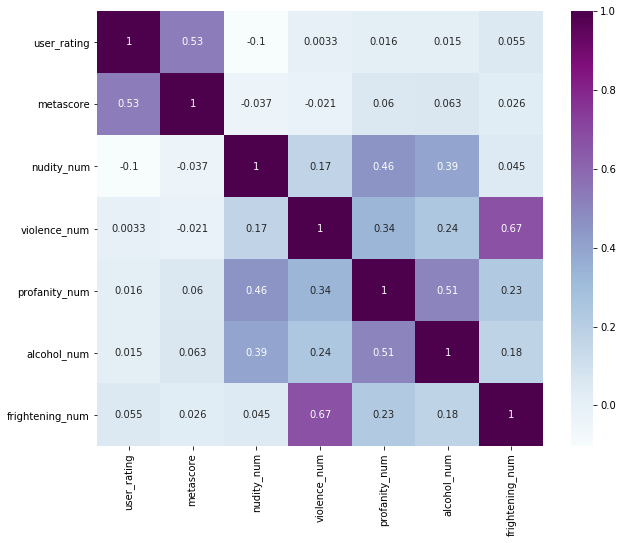

In [40]:
plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="BuPu")